1. Họ và tên:  Nguyễn Vũ Dương

2. MSSV:  20520465

3. Bài tập 3 

4. Ngày thực hiện: 21/11/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from pathlib import Path

In [ ]:
import os
path_database = "/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap3/CIR/database"
name_file = os.listdir(path_database)

In [ ]:
path_queue = '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap3/CIR/query'
dir_list_queue = os.listdir(path_queue)

In [ ]:
images =[]

In [ ]:
for img_path in name_file:
        images.append(cv2.imread(path_database+'/'+img_path))

In [ ]:
def get_histogram(image, bins=32):
    red = cv2.calcHist([image], [2], None, [bins], [0, 256])
    green = cv2.calcHist([image], [1], None, [bins], [0, 256])
    blue = cv2.calcHist([image], [0], None, [bins], [0, 256])
    histogram = np.concatenate([red, green, blue], axis=0)
    histogram = histogram.reshape(-1)
    return histogram

In [ ]:
his = get_histogram(images[-1])
his.shape

(96,)

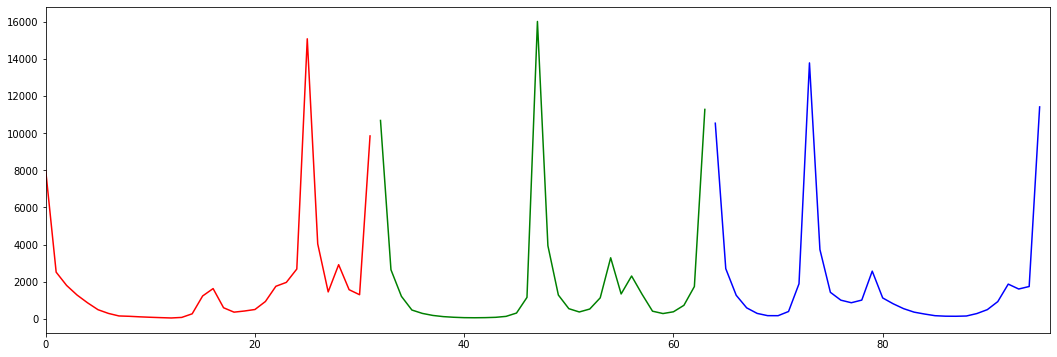

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.plot(list(range(32)), his[:32], color='red')
plt.plot(list(range(32, 64)), his[32:64], color='green')
plt.plot(list(range(64, 96)), his[64:96], color='blue')

plt.xlim(0, 96)

plt.show()

In [ ]:
image_histograms = []

In [ ]:
for image in images:
    image_histograms.append(get_histogram(image))

In [ ]:
def euclidean(a, b):
    return np.linalg.norm(a - b)
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
rgb_images = np.array([np.flip(image, 2) for image in images])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
def suport_search(path):
  img = cv2.imread(path)
  img_vector = get_histogram(img)
  return img_vector

In [ ]:
def search(path, top_k=5):
    query_vector = suport_search(path)
    distances = []
    for _, vector in enumerate(image_histograms):
        distances.append(cosine(query_vector, vector))
    # Find k relative img 
    top_idx = np.argpartition(distances, -top_k)[-top_k:]
    return top_idx

In [ ]:
def visualize(path, results_i):
    query_i = cv2.imread(path)
    query=  np.flip(query_i, 2)
    image_vec = get_histogram(query_i)
    span = int(len(image_vec)/3)
    results = rgb_images[results_i]
    top_k = len(results)
    fig, axs = plt.subplots(1, 2, figsize=(18, 10))
    axs[0].imshow(query)
    axs[0].axis('off')
    axs[1].plot(image_vec[:span], 'r', label='red')
    axs[1].plot(image_vec[span:span*2], 'g', label='green')
    axs[1].plot(image_vec[span*2:], 'b', label='blue')
    plt.show()
    fig0, axs0 = plt.subplots(1, top_k, figsize=(top_k*5, 5))
    fig1, axs1 = plt.subplots(1, top_k, figsize=(top_k*5, 5), sharey=True)
    for i in range(top_k):
        axs0[i].imshow(results[i])
        axs0[i].axis('off')
        axs1[i].plot(image_histograms[results_i[i]][:span], 'r', label='red')
        axs1[i].plot(image_histograms[results_i[i]][span:span*2], 'g', label='green')
        axs1[i].plot(image_histograms[results_i[i]][span*2:], 'b', label='blue')

In [ ]:
def Precision_Recall(img_name , search_like):
  name_find= img_name.split('_')[0]
  #print(name_find)
  True_possitive = 0
  count = 0
  for i in name_file:
    if i.split('_')[0] == name_find:
      count +=1
  for i in search_like:
    name_check =name_file[i].split('_')[0]
    #print(name_file[i])
    if name_check == name_find:
      True_possitive +=1
  precision = True_possitive/len(search_like)
  recall =  True_possitive/count
  return precision,recall    

In [ ]:
def AP(name,search_name):
  sum = 0
  same = 0
  name_find= name.split('_')[0]
  for i in range(0,len(search_name)):
    name_check =name_file[search_name[i]].split('_')[0]
    if name_check == name_find:
      same+=1
      sum += same/(i+1)
  if same !=0:    
    return sum/same
  else:
    return 0    

In [ ]:
def MAP(queue,Search_queue):
  sum = 0
  for i in range(0,len(queue)):
    sum += AP(queue[i],Search_queue[i])
  return sum/len(queue)  

In [ ]:
def support_MRR(name,search_name):
  name_find= name.split('_')[0]
  for i in range(0,len(search_name)):
    name_check =name_file[search_name[i]].split('_')[0]
    if name_check == name_find:
      return 1/(i+1)
  return 0   

In [ ]:
def MRR(queue,Search_queue):
  sum = 0 
  for i in range(0,len(queue)):
    sum += support_MRR(queue[i],Search_queue[i])
  return sum*1/len(queue)   

In [ ]:
path_folder = '/content/drive/MyDrive/CS331.N12.KHCL/Baitap/Baitap3/CIR/query/'

#Minh họa 10 kết quả khi thực hiện truy vấn bằng ảnh “ant_02.jpg”

In [ ]:
file_name = 'ant_02.jpg'
path_file = path_folder+file_name

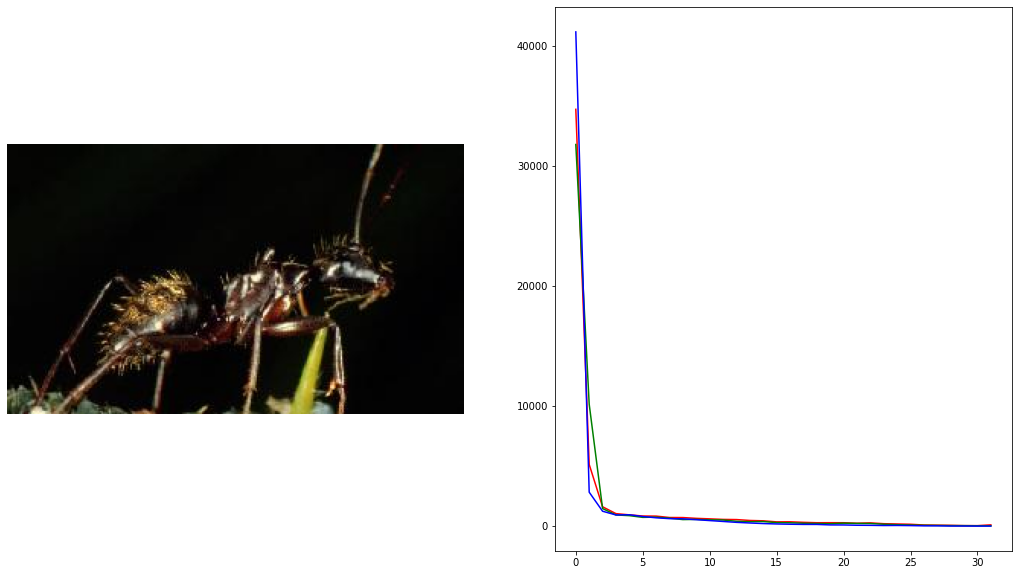

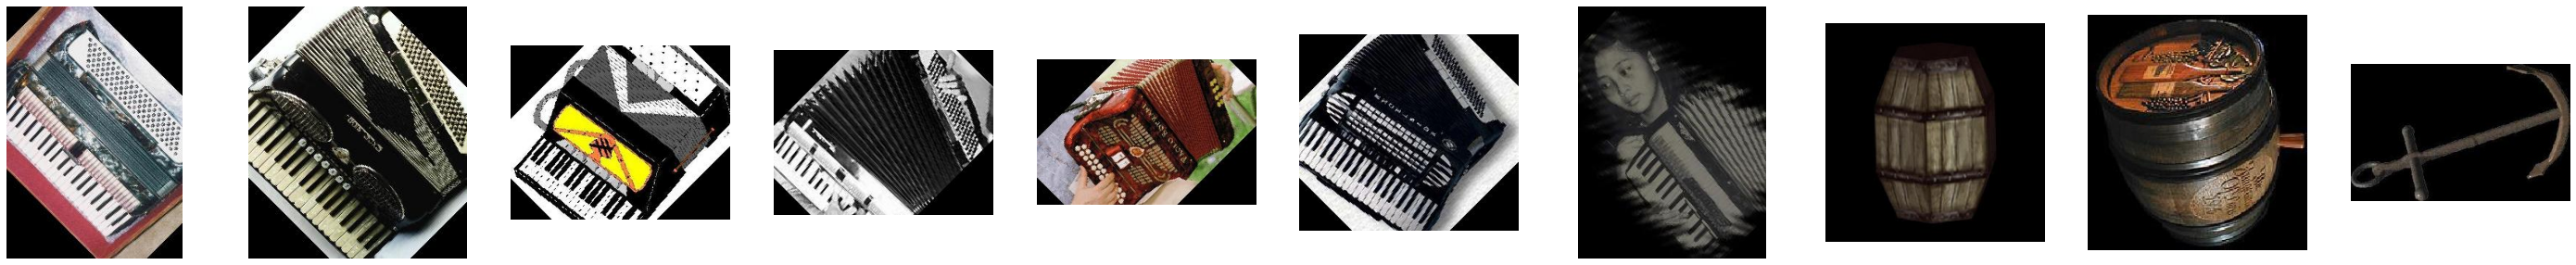

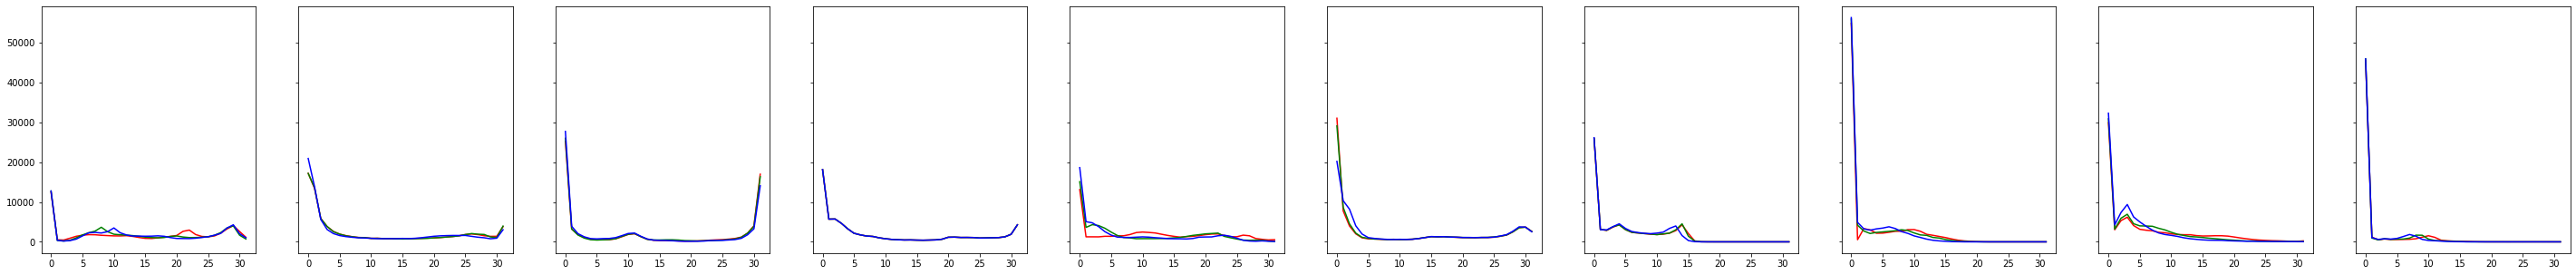

In [ ]:
visualize(path_file,search(path_file,10))

#Tính Precision@10 và Recall@10 cho 15 ảnh truy vấn.

In [ ]:
for i in dir_list_queue:
  precision,recall = Precision_Recall(i,search(path_folder+i,10))
  print(str(i) + ': precision: '+str(precision)+' recall: '+str(recall))

accordion_02.jpg: precision: 0.6 recall: 0.6
accordion_03.jpg: precision: 0.6 recall: 0.6
accordion_01.jpg: precision: 0.5 recall: 0.5
airplane_02.jpg: precision: 0.3 recall: 0.3
airplane_01.jpg: precision: 0.5 recall: 0.5
airplane_03.jpg: precision: 0.5 recall: 0.5
anchor_04.jpg: precision: 0.1 recall: 0.1
anchor_02.jpg: precision: 0.2 recall: 0.2
anchor_01.jpg: precision: 0.2 recall: 0.2
ant_02.jpg: precision: 0.0 recall: 0.0
ant_01.jpg: precision: 0.2 recall: 0.2
ant_03.jpg: precision: 0.0 recall: 0.0
barrel_01.jpg: precision: 0.0 recall: 0.0
barrel_02.jpg: precision: 0.2 recall: 0.2
barrel_03.jpg: precision: 0.2 recall: 0.2


#Tính độ đo MRR cho 15 ảnh query


In [ ]:
seach_lst_queue = []

In [ ]:
for i in dir_list_queue:
  seach_lst_queue.append(search(path_folder+'/'+i,10))

In [ ]:
print('MRR of 15 images is: '+str(MRR(dir_list_queue,seach_lst_queue)))

MRR of 15 images is: 0.27404761904761904


#Tính độ đo MAP@10

In [ ]:
print('MAP@10 is '+str(MAP(dir_list_queue,seach_lst_queue)))

MAP@10 is 0.28059523809523806
